# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Predict the salaries of future job postings by using a regression model. The prediction is done by training a model on a data consisting of salaries of different job types.

Step 1: STATING THE ASSUMPTIONS

(a) The data is a reflection of job postings within one city and we assume that it is a reflection of an extrapolated population of the city.


Step 2: LAYING DOWN THE GROUNDWORK

It is very important that we lay the groundwork by telling everyone

a) What are we analyzing: 

In the first step, we will be analyzing the correlation between the different variables of the training dataset and write down the inferences. These variables include Industry, jobtype, type of major.


b) What our variables mean: 

The different variables signify the different attributes a person can have, like the industry he/she is employed in, the years of experience that the person has. 


c) Why are we analyzing this data set:

To develop a working model that can be deployed and used to predict the salaries of future job postings with a high accuracy.



Importing the necessary libraries

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#etc

#your info here
__author__ = "Ishan Vardhan Mahajan"
__email__ = "ishanvm25@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

We load all the datasets using the pandas library and save as dataframes.

In [2]:
test_features=pd.read_csv("C:/Users/ishan/Documents/Python Scripts/DSDJ/DSDJ-data-SalaryPredictions/data/Prepared/test_features.csv")

In [3]:
train_features=pd.read_csv("C:/Users/ishan/Documents/Python Scripts/DSDJ/DSDJ-data-SalaryPredictions/data/Prepared/train_features.csv")

In [4]:
train_salaries=pd.read_csv("C:/Users/ishan/Documents/Python Scripts/DSDJ/DSDJ-data-SalaryPredictions/data/Prepared/train_salaries.csv")

Let us inspect each of the columns in the datframes and look for any null values.  

In [5]:
test_features.shape

(1000000, 8)

In [6]:
train_features.shape

(1000000, 8)

In [7]:
train_salaries.shape

(1000000, 2)

In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


There are no null values in the test dataset.

In [9]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


SImilarly, there are no null values in the train_features dataset

In [10]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


For completeness, there are no null values in the train_salaries dataset as well. Let us now, get a glimpse of the first few rows of the three dataframes created.

In [11]:
test_features.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [12]:
train_features.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [13]:
train_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

Having imported the datasets and looked a few top rows for inspection, we will now try to get an idea of the descriptive statistics of all the dataframes.

In [14]:
test_features.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

In [15]:
train_features.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

In [16]:
train_salaries.describe()

salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000

Step 3: EXPLAINING OUR FINDINGS FOR THE FIRST PART OF THE ANALYSIS.

a) What analyses we’ve done on the data: 

   Till now, we have inspected all the three dataframes created and looked for any null values. In addition, we have looked at the descriptive statistics like the mean, max, standard deviation and the the percentiles.


b) Why we did these analysis:

   It is important to set the benchmarks and baselines of the dataset from the beginning. For instance, everytime we get a dataset to explore, it is necessary to perform a quality assurance. If there are any nulls or statistics that are anomalies, then it is better to solve it right there or report it directly to the concerned authorities.
   


c) What are the preliminary findings:



### ---- 3 Clean the data ----

In [66]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [17]:
train_features[train_features.duplicated()]

Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis]
Index: []

In [18]:
train_salaries[train_salaries.duplicated()]

Empty DataFrame
Columns: [jobId, salary]
Index: []

In [19]:
test_features[test_features.duplicated()]

Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis]
Index: []

In [21]:
train_salaries[train_salaries['salary']<=0]

jobId  salary
30559   JOB1362684438246       0
495984  JOB1362684903671       0
652076  JOB1362685059763       0
816129  JOB1362685223816       0
828156  JOB1362685235843       0

Replace the above rows with the mean values.


It is important to inspect the jobs with 0 salary, as they could possibly be interns who have just started out. In addition, this information is extremely useful to make correlations as to what to expect with similar data in the future.

## Summarizing the results for Cleaning the data



a) While, there were no duplicate values in each of the three dataframes created, we found out that some of the rows in the salary column of the train_salaries dataframe has 0 values in them. This can be due to various reasons, like human error, bad data or simply that these values correspond to unpaid interns in the company. 

b) Each of the above three Hypothesis needs to be tested and evaluated before we take any correctivve action. 

c) Corrective action could involve: 
            1. Replacing the 0 values with the mean/median of the salries in the salary column.
            2. Deleting the rows completely.
            3. Going back to the source of the data and looking for possible mistakes in data extraction method.

d) We will concentrate on the Hypothesis, (1) and (2) and evaluate our findings in the next setion on EDA.

### ---- 4 Explore the data (EDA) ----

In [27]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

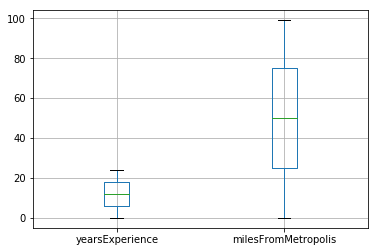

In [22]:
train_features.boxplot()

Objective: The above plot is a method to visualize the decriptive statistics for any given dataframe.

 1. In ths case, it can be seen that 'yearsExperience' has a much smaller spread, lower standard deviation, without the presence of any outliers. 
 2. Instead, milesFomMetropolis column has a very high spread of the datapoints, resulting in greater standard deviation.
            
            The above two inferences will come in handy when we build a model to predict the salaries.

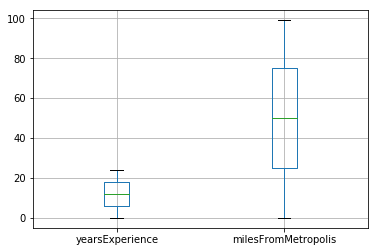

In [23]:
test_features.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF817E5EF0>]],
      dtype=object)

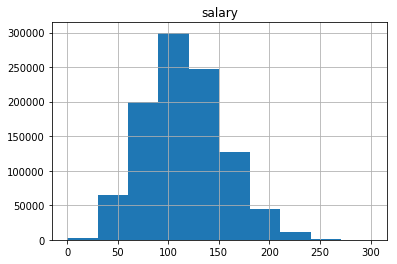

In [24]:
train_salaries.hist()

Objective of the above plot: 

The Histogram plot helps to analyze the distribution of the datapoints in the selected column. In particular, assess whether the data has a normal distribution or not. Does it have Bell curve or not and whether it is skewed to the right or left.
                 The Salary Histogram shows that it has some level of skewness incdicative of some outliers, which can be visualized eadily with a boxplot.

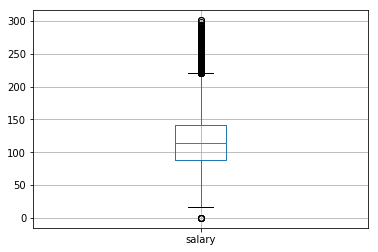

In [25]:
train_salaries.boxplot()

As it was previously tested with the 'MilesfromMetropolis' and 'yearsExperience' columns, we plot a similar boxplot for the train salaries dataframe, to evaluate the presence of any outliers as well get a sense of the spread of the datapoints.

### Step 5: EXPLAINING OUR FINDINGS FOR THE FIRST PART OF THE ANALYSIS.


a) What analyses we’ve done on the data:
   
           We have visulaized all the three variables to understand the statistics. 
   
b) Why we did these analysis:

          It is important to know whether there are any outliers in the dataset as well as have an idea about the spread of the data points. 

c) What are the preliminary findings:

          The salaries dataset follows largely a normal distrbution, although there are a few outliers that need to be addressed befor data modelling.  

### Step 6: Combining the salaries dataset with the train_features dataset.

Why we are doing this analysis:
   
           
           By combining the data from the train_features and train_salaries, we will be able to understand the relationship between the different variables and their impact on the salary.

In [26]:
train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

Creating another variable that consists of all the train features as well as the salaries, to enable an analysis between the features and the corresponding salaries.

In [27]:
Combined_data=pd.merge(train_features, train_salaries,
                      on='jobId')

In [28]:
Combined_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163

In [29]:
Combined_data[Combined_data['salary']<=0]

jobId companyId         jobType       degree        major  \
30559   JOB1362684438246    COMP44          JUNIOR     DOCTORAL         MATH   
495984  JOB1362684903671    COMP34          JUNIOR         NONE         NONE   
652076  JOB1362685059763    COMP25             CTO  HIGH_SCHOOL         NONE   
816129  JOB1362685223816    COMP42         MANAGER     DOCTORAL  ENGINEERING   
828156  JOB1362685235843    COMP40  VICE_PRESIDENT      MASTERS  ENGINEERING   

       industry  yearsExperience  milesFromMetropolis  salary  
30559      AUTO               11                    7       0  
495984      OIL                1                   25       0  
652076     AUTO                6                   60       0  
816129  FINANCE               18                    6       0  
828156      WEB                3                   29       0

Inferences:

        (a) We had earlier established that we need to test our hypotheses, whether the rows with 0 salary values are errors or they reflect the salaries of unpaid interns. 
        (b) From the above extract of the combined data, we can see that the Job Ids with Zero salaries, appear more like mistakes, as you cant expect a CTO with around 6 years of experience to be working without a salary. Similarly, the rest of the rows are more ikely a mistake. 
        (c) Course of action: In this case, replacing the 0 values with the mean of the salary column is a good solution. Removing the rows altogether will result in loss of information and we cant go back to the method of data extraction in this case.

In [30]:
train_salaries['salary']=train_salaries['salary'].replace(0,train_salaries['salary'].mean())

In [31]:
train_salaries[train_salaries['salary']<=0]

Empty DataFrame
Columns: [jobId, salary]
Index: []

Summarizing the results:

               In this section, we have done three things:
               
               (1) Made a new variable, named Combined_data that we will use in the next section to understand the relationship of different variables and their impact on the salary.
               (2) We tested our intial hypotheses for the presence of 0 salary values and concluded that they must be mistakes and not related to any job position that is unpaid. 
               (3) We took corrective action and replaced the 0 salary values with the mean of the salaries.

# Step 7: Data Visualisations for In depth Analysis

Objective of the Visualizations:

               1)  In addition to the statistical descriptions in the earlier part of our project, with the next few visualizations, we intend to understand the statistical relationship between the variables as well that on the salary variable.
               2)  We intend to use Jointplots (Pearson coefficient) , barplots and combined boxplots for this purpose.

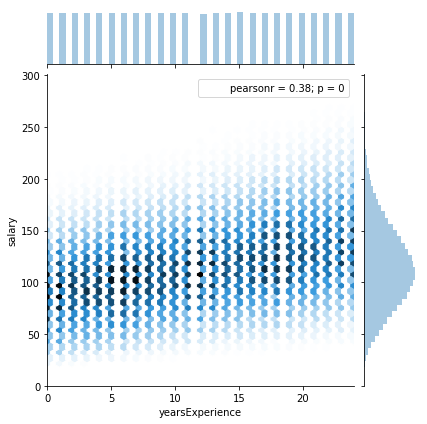

In [32]:
sns.jointplot(x='yearsExperience',y='salary', kind='hex',
             data=Combined_data)

Inference: 

        The above plot shows that a positive Pearson coefficient exists between yearsExperience and Salary, implying that an increase in years of experience has a probability of increased salary for a particular job posting. 
        
        Caveats of this analysis: The coefficient is 0.38, which is not a very high value, which we need to bear in mind befor we start our analysis.

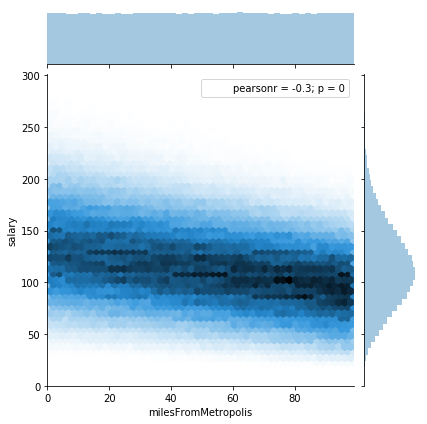

In [33]:
sns.jointplot(x='milesFromMetropolis',y='salary', kind='hex',
             data=Combined_data)

Inference: 

         (1) In complete contrast to the previous plot, a negative Pearson coefficient exists between milesFromMetropolis and Salary, implying that an increase in the distance from the metropolis results in lesser salaries.

    Hypothesis and way forward: It might be worth testing our working models without the 'milesFromMetropolis' variable and understand the impact on the accuracy. 

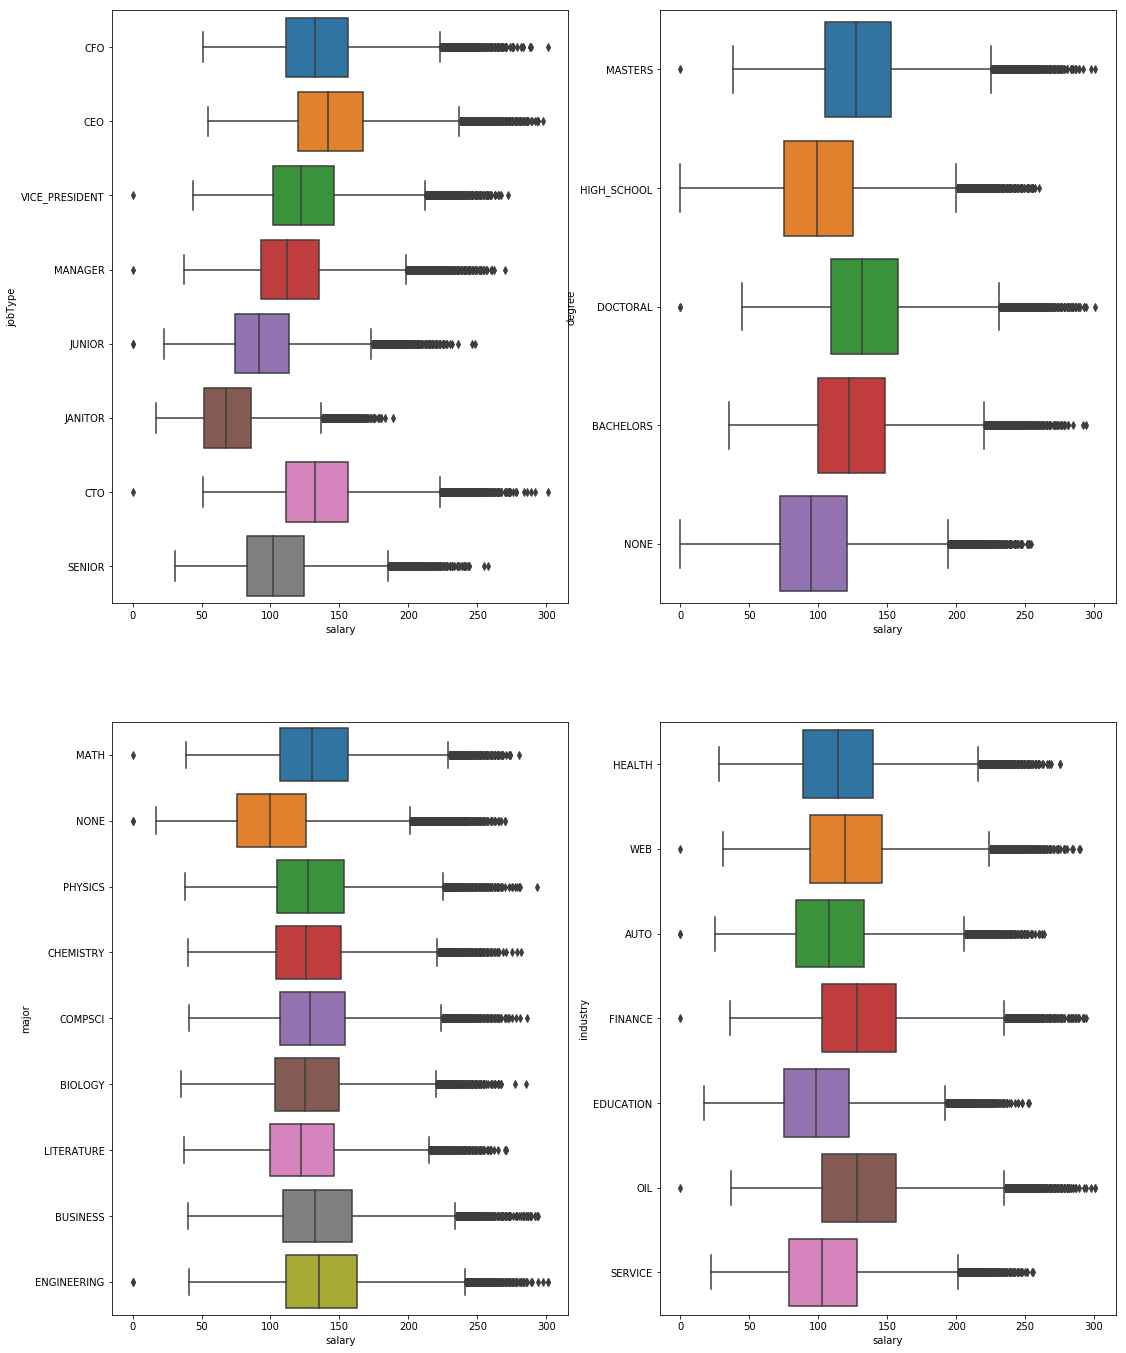

In [34]:
fig, axes=plt.subplots(nrows=2,ncols=2, figsize=(18,24)
                      )

ax=sns.boxplot(x='salary',y='jobType', 
           data=Combined_data,
              ax=axes[0,0])
ax=sns.boxplot(x='salary',y='degree', 
           data=Combined_data,
              ax=axes[0,1])
ax=sns.boxplot(x='salary',y='major', 
           data=Combined_data,
              ax=axes[1,0])
ax=sns.boxplot(x='salary',y='industry', 
           data=Combined_data,
              ax=axes[1,1])

Insights from all of the above four plots for the categorical variables:
            
            Plot of 'JobType Vs Salary'
            
            a)  Shows the plot of 'Salary' Vs 'Job Type', which clearly shows a trend. People with Job Titles of 'CEO' and 'CTO' have the highest average salaries, which is quite understandable.
            
            b)  The lowest average salaries are associated with Job Titles like Janitor, Junior which is again in line with our intuitive understanding. Most importantly, there seems to be a high correlation of JobType with their associated salaries.
            
            Plot of 'Degree Vs Salary'
            
            a)  Shows the plot of 'Salary' Vs 'Degree', which also shows a slight trend. People having higher degrees of 'Masters' and 'Doctoral' have the highest average salaries, closely followed by people having bachelor's Degrees. People with a High School Certificate and those without any degrees have the lowest average Salaries. 
            
            Plot of 'Major Vs Salary'
            
            a)  Shows the plot of 'Salary' Vs 'Degree', which does not show any clear trend. The highest average salaries are of the people with majors in Engineering, Business and Maths, although the differences are not significant anough to make clear distinctions.
            
            Plot of 'Industry Vs Salary'
            
            a)  Shows the plot of 'Industry' Vs 'Degree', does not give any clear indication of any trend. People in the Finanace and Oil Industries, although, have the highest average salaries. But, a clear distinction in salaries desparity is not present.
            
            

## Customer Segmentation according to the categorical variables

In [35]:
Segmented_industry_wise=Combined_data[['industry','salary']]

In [36]:
Segmented_industry_wise.head()

industry  salary
0   HEALTH     130
1      WEB     101
2   HEALTH     137
3     AUTO     142
4  FINANCE     163

In [37]:
Segmented_major_wise=Combined_data[['major','salary']]

In [38]:
Segmented_major_wise.head()

major  salary
0       MATH     130
1       NONE     101
2    PHYSICS     137
3  CHEMISTRY     142
4    PHYSICS     163

In [39]:
Segmented_job_Type=Combined_data[['jobType','salary']]

In [40]:
Segmented_job_Type.head()

jobType  salary
0             CFO     130
1             CEO     101
2  VICE_PRESIDENT     137
3         MANAGER     142
4  VICE_PRESIDENT     163

## Data Preprocessing for Model creation

Dropping the columns which intuitivel do not add to the prediction of salary, like JobID, company ID. In addition, variables like distancefromMetropolis, needs to be carefully studied on its impact on the final salary.

In [41]:
train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

We will drop three columns from the train_features dataset. The three columns are: 

       a) 'JobID' as intuitively, it is unlikely to have any impact on the salary of an employee.
       b) 'companyID' for the same reason as cited above.
       c) 'milesFromMetropolis' as we had earlier seen in the EDA section that it has a negative correlation with the salary variable.

In [42]:
train_features=train_features.drop(['jobId','companyId','milesFromMetropolis'],axis=1)

In [43]:
train_features.head()

jobType       degree      major industry  yearsExperience
0             CFO      MASTERS       MATH   HEALTH               10
1             CEO  HIGH_SCHOOL       NONE      WEB                3
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH               10
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO                8
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE                8

Initiating labelencoding of the variables in the train_features dataset

In [44]:
categorical_variables = ["jobType", "degree", "major","industry"]
for variable in categorical_variables:
    dummies = pd.get_dummies(train_features[variable], prefix=variable)
    train_features = pd.concat([train_features, dummies], axis=1)
    train_features.drop([variable], axis=1, inplace=True)

In [45]:
train_features.head()

yearsExperience  jobType_CEO  jobType_CFO  jobType_CTO  jobType_JANITOR  \
0               10            0            1            0                0   
1                3            1            0            0                0   
2               10            0            0            0                0   
3                8            0            0            0                0   
4                8            0            0            0                0   

   jobType_JUNIOR  jobType_MANAGER  jobType_SENIOR  jobType_VICE_PRESIDENT  \
0               0                0               0                       0   
1               0                0               0                       0   
2               0                0               0                       1   
3               0                1               0                       0   
4               0                0               0                       1   

   degree_BACHELORS      ...       major_MATH  major_NONE  major_PHYSICS  \
0                 0      ...                1           0              0   
1                 0      ...                0           1              0   
2                 0      ...                0           0              1   
3                 0      ...                0           0              0   
4                 1      ...                0           0              1   

   industry_AUTO  industry_EDUCATION  industry_FINANCE  industry_HEALTH  \
0              0                   0                 0                1   
1              0                   0                 0                0   
2              0                   0                 0                1   
3              1                   0                 0                0   
4              0                   0                 1                0   

   industry_OIL  industry_SERVICE  industry_WEB  
0             0                 0             0  
1             0                 0             1  
2             0                 0             0  
3             0                 0             0  
4             0                 0             0  

[5 rows x 30 columns]

Similarly, labelencoding the test features as done for the train features.

In [46]:
test_features.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [47]:
test_features=test_features.drop(['jobId','companyId','milesFromMetropolis'],axis=1)

In [48]:
test_features.head()

jobType       degree    major industry  yearsExperience
0  MANAGER  HIGH_SCHOOL     NONE   HEALTH               22
1   JUNIOR         NONE     NONE     AUTO               20
2      CTO      MASTERS  BIOLOGY   HEALTH               17
3  MANAGER  HIGH_SCHOOL     NONE      OIL               14
4   JUNIOR     DOCTORAL  BIOLOGY      OIL               10

In [49]:
categorical_variables = ["jobType", "degree", "major","industry"]
for variable in categorical_variables:
    dummies = pd.get_dummies(test_features[variable], prefix=variable)
    test_features = pd.concat([test_features, dummies], axis=1)
    test_features.drop([variable], axis=1, inplace=True)

In [50]:
test_features.head()

yearsExperience  jobType_CEO  jobType_CFO  jobType_CTO  jobType_JANITOR  \
0               22            0            0            0                0   
1               20            0            0            0                0   
2               17            0            0            1                0   
3               14            0            0            0                0   
4               10            0            0            0                0   

   jobType_JUNIOR  jobType_MANAGER  jobType_SENIOR  jobType_VICE_PRESIDENT  \
0               0                1               0                       0   
1               1                0               0                       0   
2               0                0               0                       0   
3               0                1               0                       0   
4               1                0               0                       0   

   degree_BACHELORS      ...       major_MATH  major_NONE  major_PHYSICS  \
0                 0      ...                0           1              0   
1                 0      ...                0           1              0   
2                 0      ...                0           0              0   
3                 0      ...                0           1              0   
4                 0      ...                0           0              0   

   industry_AUTO  industry_EDUCATION  industry_FINANCE  industry_HEALTH  \
0              0                   0                 0                1   
1              1                   0                 0                0   
2              0                   0                 0                1   
3              0                   0                 0                0   
4              0                   0                 0                0   

   industry_OIL  industry_SERVICE  industry_WEB  
0             0                 0             0  
1             0                 0             0  
2             0                 0             0  
3             1                 0             0  
4             1                 0             0  

[5 rows x 30 columns]

In [51]:
train_salaries=train_salaries.drop(['jobId'],axis=1)

In [52]:
train_salaries.head()

salary
0   130.0
1   101.0
2   137.0
3   142.0
4   163.0

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### Random Forest Regression

In [61]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50)
model.fit(train_features,train_salaries)

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
test_salaries=model.predict(test_features)

In [63]:
test_salaries

array([130.55138761,  88.79911594, 153.19381739, ...,  63.04084525,
       168.71050933, 100.82656576])

In [64]:
from sklearn.metrics import mean_absolute_error

In [65]:
mean_absolute_error(train_salaries,test_salaries)

40.16023208764872

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mean_squared_error(train_salaries,test_salaries)

2514.8670837204777

In [66]:
model.feature_importances_

array([0.22015201, 0.01082999, 0.00134665, 0.00136697, 0.28261742,
       0.1037876 , 0.03861341, 0.06795493, 0.01322836, 0.00522882,
       0.00820084, 0.00235835, 0.00336739, 0.00456201, 0.00249718,
       0.00551044, 0.00249982, 0.00215699, 0.00700848, 0.00303514,
       0.00328842, 0.07673307, 0.00241421, 0.02559139, 0.04392801,
       0.00211002, 0.01473571, 0.00247073, 0.03377627, 0.00862939])

In [67]:
feature_importances=pd.Series(model.feature_importances_,index=train_features.columns)

In [68]:
print(feature_importances)

yearsExperience           0.220152
jobType_CEO               0.010830
jobType_CFO               0.001347
jobType_CTO               0.001367
jobType_JANITOR           0.282617
jobType_JUNIOR            0.103788
jobType_MANAGER           0.038613
jobType_SENIOR            0.067955
jobType_VICE_PRESIDENT    0.013228
degree_BACHELORS          0.005229
degree_DOCTORAL           0.008201
degree_HIGH_SCHOOL        0.002358
degree_MASTERS            0.003367
degree_NONE               0.004562
major_BIOLOGY             0.002497
major_BUSINESS            0.005510
major_CHEMISTRY           0.002500
major_COMPSCI             0.002157
major_ENGINEERING         0.007008
major_LITERATURE          0.003035
major_MATH                0.003288
major_NONE                0.076733
major_PHYSICS             0.002414
industry_AUTO             0.025591
industry_EDUCATION        0.043928
industry_FINANCE          0.002110
industry_HEALTH           0.014736
industry_OIL              0.002471
industry_SERVICE    

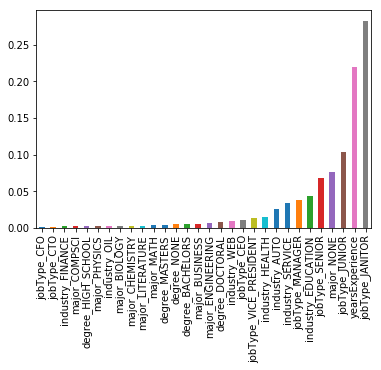

In [69]:
feature_importances.sort_values(inplace=True)
feature_importances.plot.bar()

### Multiple Linear Regression 

In [71]:
from sklearn.linear_model import LinearRegression

In [73]:
Model_2=LinearRegression()
Model_2.fit(train_features,train_salaries)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
test_salaries=Model_2.predict(test_features)

In [75]:
test_salaries

array([[125.09326172],
       [ 91.08837891],
       [150.5078125 ],
       ...,
       [ 61.70703125],
       [169.95214844],
       [104.37988281]])

In [77]:
Model_2.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [ ]:


from sklearn.model_selection import KFold # import KFold
X = train_features # create an array
y = train_salaries # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split(X):
 print(“TRAIN:”, train_index, “TEST:”, test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data